In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("theo_customer_feedback.csv")

In [3]:
data

,customerID,experience_without_device,experience_with_device,user_interface,quality_of_suggestions,overall_experience
0,1001,not bad,good experience and I liked it.,8,7,8
1,1002,bad,enjoyed it a lot. No isses with the device,9,6,8
2,1003,felt difficult to understand the impact,easy to monitor the results,9,9,10
3,1004,good,comes with additional benefits,7,7,7


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: regex in c:\users\vamsee\anaconda3\lib\site-packages (from nltk) (2020.10.15)



You should consider upgrading via the 'C:\Users\vamsee\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
import nltk

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
from nltk.corpus import stopwords
stopwords.words('english')[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
raw_data= open("SMSSpamCollection.tsv").read()

In [9]:
raw_data[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [10]:
## \t is added after every label and \n for every new line, now remove the \n and \t and split the sentence into words

parsed_data = raw_data.replace("\t",'\n').split("\n")

In [11]:
parsed_data[:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [12]:
## seperating labels and sentences apart

labels = parsed_data[0::2]
sentenses = parsed_data[1::2]

In [13]:
labels[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [14]:
### now create a data frame with the available columns
corpus_df = pd.DataFrame({"label":labels[:-1],"sentenses":sentenses})

In [15]:
corpus_df.head()

,label,sentenses
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [16]:
### the whole process of creating the dataset can be easily achieved by using pandas as below

corpus_df_sample = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)


In [17]:
corpus_df_sample.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [18]:
### the column names has to be meaningfull, it can be changed by using
corpus_df_sample.columns= ["labels","sentences"]

In [19]:
corpus_df_sample.sample(1)

,labels,sentences
1966,spam,You have won a guaranteed £200 award or even £...


In [20]:
corpus_df_sample.shape

(5568, 2)

In [21]:
corpus_df_sample["labels"].value_counts()

ham     4822
spam     746
Name: labels, dtype: int64

In [22]:
corpus_df_sample.isnull().sum()

labels       0
sentences    0
dtype: int64

### A small intro to regular expressions

In [23]:
import re

In [24]:
text1 ="Hello world, this is a sample text to work on regular expressions"
text2 ="Hello       world, this   is a     sample text to work         on           regular expressions"
text3 ="Hello*///..,;>>>>>>>-world,this-is||||||////////////a-sample-text-to-work*...,...,-on-regular-expressions"

In [25]:
### this \s splits the text after single white space
re.split("\s", text1)

['Hello',
 'world,',
 'this',
 'is',
 'a',
 'sample',
 'text',
 'to',
 'work',
 'on',
 'regular',
 'expressions']

In [26]:
### to work same for the many white spaces add \s+ in the reg ex
re.split("\s+", text2)

['Hello',
 'world,',
 'this',
 'is',
 'a',
 'sample',
 'text',
 'to',
 'work',
 'on',
 'regular',
 'expressions']

In [27]:
### for texts containing all special characters other than alphabets, \W+ is used as below
print(text3)
re.split("\W+", text3)

Hello*///..,;>>>>>>>-world,this-is||||||////////////a-sample-text-to-work*...,...,-on-regular-expressions


['Hello',
 'world',
 'this',
 'is',
 'a',
 'sample',
 'text',
 'to',
 'work',
 'on',
 'regular',
 'expressions']

In [28]:
### \s is used for white space characters, \S is used for non white space characters, \W is used for special characters, \w one or more word characters

In [29]:
### the above statement can also be rewritten as 
re.findall("\w+", text3)

['Hello',
 'world',
 'this',
 'is',
 'a',
 'sample',
 'text',
 'to',
 'work',
 'on',
 'regular',
 'expressions']

In [30]:
### to replace UK19, AUS20 to USA21 in the texts

omp1= "The winners of olympics is UK19"
omp2= "The winners of olympics is AUS20"

In [31]:
## sub method with the regular expression is used to replace the text as below

re.sub("[A-Z]+[0-9]+","USA21", omp1)

'The winners of olympics is USA21'

In [32]:
re.sub("[A-Z]+[0-9]+", "USA21", omp2)

'The winners of olympics is USA21'

In [33]:
### to customize the number of rows that can be seen in a dataframe use - pd.set_option("display.max_colwidth", 100)

In [34]:
### remove punctuation
## string package holds the list of punctuations

import string

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## the task is to remove punctuations from the text, to do this lets  create a function

In [36]:
def remove_punct(text):
    cleaned_text= "".join([char for char in text if char not in string.punctuation ])
    return cleaned_text

In [37]:
corpus_df_sample["cleaned_text"]= corpus_df_sample["sentences"].apply(lambda x: remove_punct(x))

In [38]:
corpus_df_sample

,labels,sentences,cleaned_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL
...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


### now the task is tokenization

In [39]:
## it generally is splitting the sentence into list of words
def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens

In [40]:
corpus_df_sample["tokenized_data"]= corpus_df_sample["cleaned_text"].apply(lambda x: tokenize(x.lower()))

In [41]:
corpus_df_sample.head()

,labels,sentences,cleaned_text,tokenized_data
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [42]:
stop_words = nltk.corpus.stopwords.words("english")

In [43]:
### now remove stop words (most occuring irrelevent words)

def remove_stopwords(words):
    res = [ word for word in words if word not in stop_words]
    return res

In [44]:
corpus_df_sample["text_with_nostop"]= corpus_df_sample["tokenized_data"].apply(lambda x : remove_stopwords(x))

In [45]:
corpus_df_sample.head()

,labels,sentences,cleaned_text,tokenized_data,text_with_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [46]:
### applying stemming on the data

ps = nltk.PorterStemmer()

In [47]:
def stem_text(text):
    stemdata= [ps.stem(word) for word in text]
    return stemdata

In [48]:
corpus_df_sample["stemmed_text"]= corpus_df_sample["text_with_nostop"].apply(lambda x: stem_text(x))

In [49]:
corpus_df_sample

,labels,sentences,cleaned_text,tokenized_data,text_with_nostop,stemmed_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"
...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tri, 2, contact, u, u, 750, pound,..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som..."


In [50]:
### lemmatize words

wm = nltk.WordNetLemmatizer()

In [51]:
def lemmitize_text(text):
    res = [wm.lemmatize(word) for word in text]
    return res

In [52]:
corpus_df_sample["lemmitize_text"]= corpus_df_sample["text_with_nostop"]. apply(lambda x: lemmitize_text(x))

In [53]:
corpus_df_sample

,labels,sentences,cleaned_text,tokenized_data,text_with_nostop,stemmed_text,lemmitize_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
...,...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tri, 2, contact, u, u, 750, pound,...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]","[ü, b, going, esplanade, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


In [54]:
def clean_text(text):
    
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    token= re.split('\W+',text)
    text = [ps.stem(word) for word in token if word not in stop_words]
    return text

In [55]:
### vectorize the text

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)

## we can also use hyper paramters like analyzer and pass the method like how we apply using lambda 

## now apply fit and transform on the data to train the vectorizer
vect_data = count_vect.fit_transform(corpus_df_sample["sentences"])

In [56]:
print(vect_data.shape)

(5568, 8107)


In [57]:
### take the sample to understand the vectorization in better

samp_data = corpus_df_sample[:20]
count_vect_sample = CountVectorizer(analyzer=clean_text)
vect_data_sample = count_vect_sample.fit_transform(samp_data["sentences"])

In [58]:
vect_sample_df= pd.DataFrame(vect_data_sample.toarray())

In [59]:
vect_sample_df.columns = count_vect_sample.get_feature_names()

In [60]:
vect_sample_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
### n-gram vectorizer
### for n-gram whole string has to be given as input, so the changes to the previous methods has to be applied as 
def clean_text_ngrams(text):
    
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    token= re.split('\W+',text)
    text = " ".join([ps.stem(word) for word in token if word not in stop_words])
    return text

In [62]:
samp_data["ngram_text"]= corpus_df_sample["sentences"].apply(lambda x: clean_text_ngrams(x))

<ipython-input-62-e161b14074e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_data["ngram_text"]= corpus_df_sample["sentences"].apply(lambda x: clean_text_ngrams(x))


In [63]:
samp_data

,labels,sentences,cleaned_text,tokenized_data,text_with_nostop,stemmed_text,lemmitize_text,ngram_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",ive search right word thank breather promis wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi...",per request mell mell oru minnaminungint nurun...
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv...","[winner, valued, network, customer, selected, ...",winner valu network custom select receivea 900...
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobil, 11, month, u, r, entitl, updat, latest...","[mobile, 11, month, u, r, entitled, update, la...",mobil 11 month u r entitl updat latest colour ...
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[im, gonna, be, home, soon, and, i, dont, want...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf...",im gonna home soon dont want talk stuff anymor...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[six, chances, to, win, cash, from, 100, to, 2...","[six, chances, win, cash, 100, 20000, pounds, ...","[six, chanc, win, cash, 100, 20000, pound, txt...","[six, chance, win, cash, 100, 20000, pound, tx...",six chanc win cash 100 20000 pound txt csh11 s...


In [64]:
### n grams vectorizer is applied as below

vect_ngram_samp= CountVectorizer(ngram_range=(2,2))
vect_res = vect_ngram_samp.fit_transform(samp_data["ngram_text"])
print(vect_res.shape)
print(vect_ngram_samp.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

In [65]:
ngram_samp_df = pd.DataFrame(vect_res.toarray())
ngram_samp_df.columns = vect_ngram_samp.get_feature_names()

In [66]:
ngram_samp_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
### Inverse document frequency method
def clean_text_tfidf(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    token= re.split('\W+',text)
    text = [ps.stem(word) for word in token if word not in stop_words]
    return text

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector_samp = TfidfVectorizer(analyzer= clean_text_tfidf)
tfidf_vect_data = tfidf_vector_samp.fit_transform(samp_data["sentences"])


In [69]:
tfidf_text_df = pd.DataFrame(tfidf_vect_data.toarray())
tfidf_text_df.columns = tfidf_vector_samp.get_feature_names()

In [70]:
## this displays the column values other than 1 , which indicates the strength of a word occuring when compared to other words
tfidf_text_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature engineering 

the feature engineering involves various steps like the length of the text, number of punctuations and usage of capital letters may give information about the type of the text, so they are calculated one by one as below

In [71]:


## taking raw data to work on it

ft_data = pd.read_csv("SMSSpamCOllection.tsv", sep="\t")

In [72]:
ft_data.columns = ["label",'sentence']

In [73]:
## 1. length of the text
## the logic lambda x: len(x) - x.count(" ") removes the white spaces from the texts

ft_data["text_length"]= ft_data["sentence"].apply(lambda x: len(x) - x.count(" "))


In [74]:
## 2. count of punctuations 

def count_punct(text):
    count = sum([1 for word in text if word in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100


ft_data["punct_perc"]= ft_data["sentence"].apply(lambda x: count_punct(x))

In [75]:
ft_data

,label,sentence,text_length,punct_perc
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4
...,...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u...,131,6.1
5563,ham,Will ü b going to esplanade fr home?,29,3.4
5564,ham,"Pity, * was in mood for that. So...any other s...",48,14.6
5565,ham,The guy did some bitching but I acted like i'd...,100,1.0


### feature evaluation 

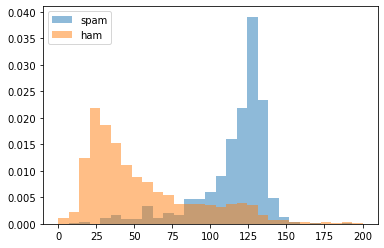

In [77]:
bins= np.linspace(0, 200, 30)
plt.hist(ft_data[ft_data["label"]=='spam']["text_length"], bins, density=True, stacked=True,alpha = 0.5, label= "spam" )
plt.hist(ft_data[ft_data["label"]=='ham']["text_length"], bins, density=True, stacked=True,alpha = 0.5, label= "ham" )
plt.legend(loc="upper left")
plt.show()

this clearly expains that texts of large length are mostly spam than the text of small length, so its an important feature to include for analysis

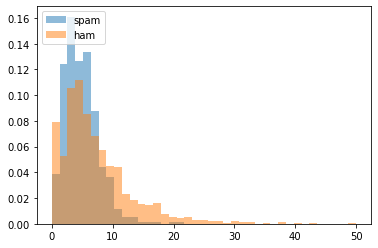

In [78]:
### now analyze the same for punctuations

bins = np.linspace(0, 50, 40)
plt.hist(ft_data[ft_data["label"]=='spam']["punct_perc"], bins, density=True, stacked=True, alpha = 0.5, label ="spam")
plt.hist(ft_data[ft_data["label"]=='ham']["punct_perc"], bins, density=True, stacked=True, alpha = 0.5, label ="ham")
plt.legend(loc="upper left")
plt.show()


This says the spam has more punctuations than ham but that not very accurate about our hypothesis 

## Applying transformation 

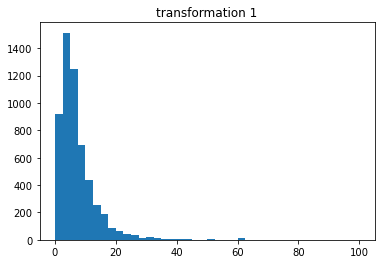

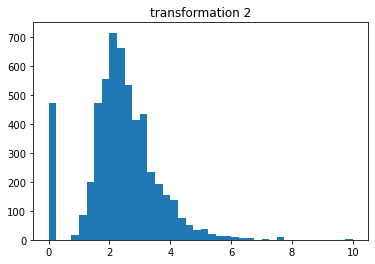

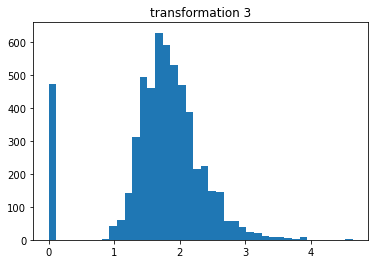

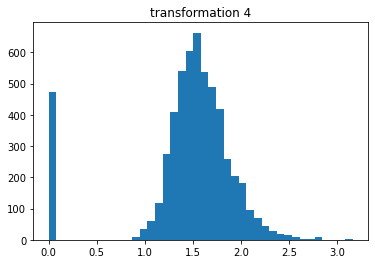

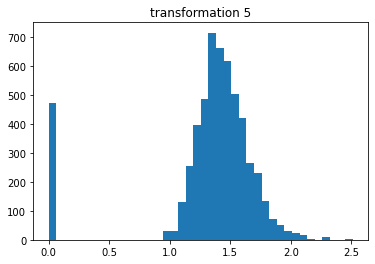

In [79]:
## It’s a process that alters each data point in a certain column in a systematic way and makes data cleaner.
## the Box-Cox power transformation is the good approach that applies transformation rules and make data cleaner

for i in [1,2,3,4,5]:
    
    plt.hist((ft_data["punct_perc"])**(1/i),bins= 40 )
    plt.title("transformation {}".format(str(i)))
    plt.show()

The tranformation 4 and 5 are not skewed and this transformation is good to apply to understand more about the features

## Machine learning models applied on the data 

Building machine learning classifiers:

What is machine learning? - the algorithms that performs important tasks by generalizing from examples. 

Use algorithms to parse data, learn from data and predict something from the data.

Supervised learning : training data contains labels and make predictions on unseen data
Eg - finding spam emails 

Unsupervised learning: no labels 
Eg - grouping emails based on their content


Model validation techniques:

K-Fold cross validation:

All data is divided into k subsets, testout is applied on all k sets by taking 1 set as test data and k-1 as train data. 



Evaluation metrics:

Accuracy = no of observations predicted correctly/ total number of observations

Precision = no of observations that are predicted spam that are actually spam/ total no of observations predicted as spam  

Recall = no of observations that are predicted spam that are actually spam/ total spams in the df


In [80]:
### applying quick data cleaning process frm the beginning

ML_raw_data= pd.read_csv("SMSSpamCollection.tsv", sep="\t")
ML_raw_data.columns =["label","sentence"]

In [82]:
ML_raw_data["text_length"]= ML_raw_data["sentence"].apply(lambda x: len(x) - x.count(" "))

In [86]:
def calc_punct(text):
    res = sum([1 for word in text if word in string.punctuation])
    return round(res/ (len(text) - text.count(" ")), 3)*100


In [87]:
ML_raw_data["punct_perc"]= ML_raw_data["sentence"].apply(lambda x: calc_punct(x))

In [102]:
### clean data

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    token = re.split("\W+", text)
    text = [ps.stem(word) for word in token if word not in stop_words]
    return text

In [103]:
ML_raw_data["cleaned_data"]= ML_raw_data["sentence"].apply(lambda x: clean_text(x))

now apply vectorization on the data, out of all methods like count, n gram and inverse document frequency i am applying the last method

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
vector_model = TfidfVectorizer(analyzer=clean_text)
vector_model_fit= vector_model.fit_transform(ML_raw_data["sentence"])
ML_vector_df = pd.DataFrame(vector_model_fit.toarray())
ML_vector_df.columns = vector_model.get_feature_names()

In [150]:
All_feature_df=pd.concat([ML_raw_data["text_length"], ML_raw_data["punct_perc"], pd.DataFrame(vector_model_fit.toarray())], axis=1)

In [151]:
All_feature_df_tfidf=pd.concat([ML_raw_data["text_length"], ML_raw_data["punct_perc"], pd.DataFrame(vector_model_fit.toarray())], axis=1)

In [152]:
### this part is added to apply GridSearchCV on both countVectorization and tfidf vectorization

from sklearn.feature_extraction.text import CountVectorizer

vector_model = TfidfVectorizer(analyzer=clean_text)
vector_model_fit= vector_model.fit_transform(ML_raw_data["sentence"])
ML_vector_df = pd.DataFrame(vector_model_fit.toarray())
ML_vector_df.columns = vector_model.get_feature_names()

All_feature_df_count=pd.concat([ML_raw_data["text_length"], ML_raw_data["punct_perc"], pd.DataFrame(vector_model_fit.toarray())], axis=1)

We have created a new data frame which contains features inside it, now we will apply random forest model on the data


In [112]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
print(dir(RandomForestClassifier))
RandomForestClassifier()

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


RandomForestClassifier()

In [116]:
from sklearn.model_selection import KFold, cross_val_score

In [120]:
model = RandomForestClassifier( n_jobs=-1)
kfolds = KFold(n_splits=5)
cross_val = cross_val_score(model, All_feature_df, ML_raw_data["label"], cv=kfolds, scoring="accuracy", n_jobs=-1)
### n jobs is set to -1, to run decision trees in parallel and increase the speed of execution
### scoring represents the type of evaluation required on the analysis such as accuracy, precision, recall
### n estimators represents the number of decision trees, default size is 10
### max_depth represents the depth of each individual decision tree

In [121]:
print(cross_val)

[0.97666068 0.97755835 0.97484277 0.9640611  0.97484277]


## now apply the random forest model on the hold out set

In [130]:
### now apply the random forest model on the hold out set

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [123]:
train_x, test_x, train_y, test_y= train_test_split(All_feature_df,ML_raw_data["label"], test_size=0.2 )

In [129]:
print(train_x.sample(1))
print(test_x.sample(1))
print(train_y.sample(1))
print(test_y.sample(1))

    text_length  punct_perc    0    1    2    3    4    5    6    7  ...  \
20          117         6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

    8094  8095  8096  8097  8098  8099  8100  8101  8102  8103  
20   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1 rows x 8106 columns]
     text_length  punct_perc    0    1    2    3    4    5    6    7  ...  \
159          129        10.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

     8094  8095  8096  8097  8098  8099  8100  8101  8102  8103  
159   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1 rows x 8106 columns]
3488    ham
Name: label, dtype: object
4784    ham
Name: label, dtype: object


In [124]:
### n estimators set to 50
### max depth is 20

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model= rf.fit(train_x, train_y)

In [127]:
### check the feature importance using

sorted(zip(rf_model.feature_importances_, train_x.columns), reverse=True)[:10]

[(0.0420037247818106, 7350),
 (0.030944955979819923, 'text_length'),
 (0.029927527839988012, 4796),
 (0.029774823874892206, 5724),
 (0.0241854388897835, 3134),
 (0.021915613882127292, 1803),
 (0.02084351578764038, 2031),
 (0.019675490430603914, 5988),
 (0.017821596429745554, 7218),
 (0.016165739150659948, 690)]

In [131]:
### check the score 

Y_pred = rf_model.predict(test_x)
precision,recall,fscore,support=score( test_y, Y_pred, pos_label="spam", average="binary")

In [134]:
### if the predicated values matches the test labels row by row then the matches are summed and divided with the total length of data
accuracy = (Y_pred==test_y).sum()/ len(Y_pred)

In [137]:
print(accuracy)
print(precision)
print(recall)

0.9344703770197487
1.0
0.5493827160493827


To explain accuracy, precision and spam, let consider a email inbox, 
the precision 1 says that 100% of mails that are added into spam are spam
the recall 54.9 percent says that only 54.9 percent of mails are added into the spam, there are still 43.9 percent of mails in inbox are considered not spam, which is not a good result
the accuracy 93.4 indicates that, this percentage of mails are properly identified out of all available mails

In [ ]:
new_text = "Hello Welcome to the new world !@$#@%#%$@^%!%&%@@&^@%&"


### Random forest with grid search


 it is just trail and error method of setting different values to hyper parameters forming a loop and evaluating the result

In [139]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [140]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(All_feature_df, ML_raw_data["label"], test_size=0.2)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [143]:

def rf_gridmodel(depth, est):
    rf = RandomForestClassifier(max_depth=depth, n_estimators = est, n_jobs=-1)
    rf_model = rf.fit(Xtrain, Ytrain)
    y_pred = rf_model.predict(Xtest)
    precision,recall,fscore,support = score(Ytest, y_pred, pos_label="spam", average="binary")
    print("est {}, depth {} - makes precision {}, recall {}, fscore {} and support {}".format(est,depth,precision,recall,fscore,support))

In [144]:
for est in [20,30,40]:
    for depth in [10,20,30,40]:
        rf_gridmodel(depth,est)

est 20, depth 10 - makes precision 1.0, recall 0.18125, fscore 0.3068783068783069 and support None
est 20, depth 20 - makes precision 1.0, recall 0.5625, fscore 0.72 and support None
est 20, depth 30 - makes precision 1.0, recall 0.6875, fscore 0.8148148148148148 and support None
est 20, depth 40 - makes precision 1.0, recall 0.7, fscore 0.8235294117647058 and support None
est 30, depth 10 - makes precision 1.0, recall 0.18125, fscore 0.3068783068783069 and support None
est 30, depth 20 - makes precision 1.0, recall 0.49375, fscore 0.6610878661087867 and support None
est 30, depth 30 - makes precision 1.0, recall 0.66875, fscore 0.8014981273408239 and support None
est 30, depth 40 - makes precision 1.0, recall 0.7125, fscore 0.832116788321168 and support None
est 40, depth 10 - makes precision 1.0, recall 0.2375, fscore 0.3838383838383838 and support None
est 40, depth 20 - makes precision 1.0, recall 0.51875, fscore 0.6831275720164609 and support None
est 40, depth 30 - makes precisio

### evaluating Random forest using GridSearchCV


In [149]:
from sklearn.model_selection import GridSearchCV

In [157]:
rf_cv = RandomForestClassifier()
params ={"n_estimators":[50,150,200], "max_depth":[30,40,50,60]}

gs= GridSearchCV(rf_cv, params, cv=5, n_jobs=-1)
gs_fit= gs.fit(All_feature_df_tfidf,ML_raw_data["label"] )
rf_df= pd.DataFrame(gs_fit.cv_results_)

In [154]:
rf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [158]:
rf_df.sort_values(["mean_score_time"],ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,25.104599,0.806855,0.703837,0.126292,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.969479,0.960503,0.962264,0.956873,0.953279,0.960480,0.005459,10
5,34.233225,1.590848,0.638655,0.121600,40,200,"{'max_depth': 40, 'n_estimators': 200}",0.973968,0.967684,0.964960,0.963163,0.965858,0.967126,0.003718,8
4,27.879538,0.592795,0.615330,0.051267,40,150,"{'max_depth': 40, 'n_estimators': 150}",0.973968,0.970377,0.964960,0.964960,0.962264,0.967306,0.004248,7
2,31.796061,1.144223,0.606881,0.018348,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.970377,0.961400,0.962264,0.951482,0.955975,0.960300,0.006373,11
8,38.180534,0.738278,0.577606,0.052510,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.976661,0.970377,0.969452,0.962264,0.968553,0.969461,0.004589,6


## Gradient Boosing 

This is an ensemble learning method that takes an iterative approach by combining weak learners to create a strong learner by focusing on mistakes of prior iterations.!

because all the decision trees will not execute parallel, the exection time in more when compared to Gradient Boost

it also uses decision trees inside as random forest ,lets see the execution of Gradient Boosting

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [164]:
def grid_gb(est, depth, learning_rt):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=depth,learning_rate=learning_rt)
    gb_fit= gb.fit(Xtrain, Ytrain)
    y_pred = gb_fit.predict(Xtest)
    precision,recall,fscore,support= score(Ytest,y_pred, pos_label="spam", average="binary" )
    print("est {}, depth {}, learning rate {}, precision {}, recall{}, average{}",est,depth,learning_rt,precision,recall, (y_pred==Ytest).sum()/len(Ytest))

In [165]:
for est in [30,100,150]:
    for depth in [5,7,10,13]:
        for lr in [0.01,0.1,1]:
            grid_gb(est,depth,lr)

C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 5 0.01 0.0 0.0 0.8563734290843806
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 5 0.1 0.9504132231404959 0.71875 0.9542190305206463
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 5 1 0.8428571428571429 0.7375 0.9425493716337523


C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 7 0.01 0.0 0.0 0.8563734290843806
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 7 0.1 0.9444444444444444 0.74375 0.9569120287253142
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 7 1 0.8832116788321168 0.75625 0.9506283662477558


C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 10 0.01 0.0 0.0 0.8563734290843806
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 10 0.1 0.9534883720930233 0.76875 0.9614003590664273
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 10 1 0.8920863309352518 0.775 0.9542190305206463


C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 13 0.01 0.0 0.0 0.8563734290843806
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 13 0.1 0.96875 0.775 0.9640933572710951
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 30 13 1 0.8652482269503546 0.7625 0.9488330341113106
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 100 5 0.01 0.9775280898876404 0.54375 0.9326750448833034
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 100 5 0.1 0.9197080291970803 0.7875 0.9596050269299821
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 100 5 1 0.8561151079136691 0.74375 0.9452423698384201
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 100 7 0.01 0.9702970297029703 0.6125 0.9416517055655296
est {}, depth {}, learning rate {}, precision {}, recall{}, average{} 100 7 0.1 0.9191176470588235 0.78125 0.9587073608617595
est {}, depth {}, learning r

KeyboardInterrupt: 